In [1]:
import pandas as pd

amazon_data = pd.read_csv("amazon-pqa.csv", index_col=0)

In [2]:
amazon_data.reset_index(drop=True, inplace=True)

In [3]:
categories = amazon_data.category.unique()

In [4]:
pcount = []

for category in categories:
    pcount.append(len(amazon_data.loc[amazon_data['category'] == category]))

In [5]:
len(amazon_data)

1473508

In [6]:
amazon_data.loc[amazon_data['category'] == category].sample(3)

,item_name,category
1470516,DKNY Ceramic Bracelet Mother-of-pearl Dial Wom...,wrist_watches
1451637,Suunto Ambit2 Black Altimeter Fitness Watch SS...,wrist_watches
1469342,Invicta Men's 0636 Akula II Reserve Chronograp...,wrist_watches


In [7]:
for idx, category in enumerate(categories):
    if pcount[idx] > 100:
        n_drop = pcount[idx] - 100
        amazon_data = amazon_data.drop(amazon_data.loc[amazon_data['category'] == category].sample(n_drop).index)

In [8]:
len(amazon_data)

10000

In [9]:
pcount = []

for category in categories:
    pcount.append(len(amazon_data.loc[amazon_data['category'] == category]))

In [10]:
import numpy as np
np.min(pcount)

100

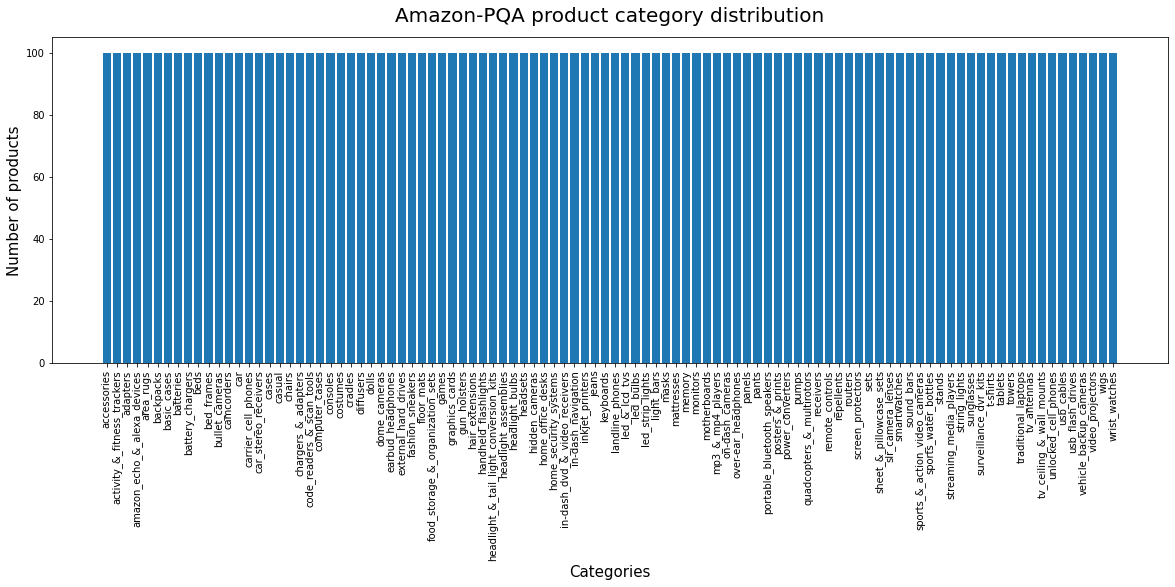

In [11]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(20,6))

ax.bar(categories, pcount)
ax.set_xticks(categories)
ax.set_xticklabels(categories, rotation='vertical')

plt.title("Amazon-PQA product category distribution",fontsize=20, pad=15)
plt.xlabel("Categories", fontsize=15)
plt.ylabel("Number of products", fontsize=15)

plt.show()

In [12]:
amazon_data.reset_index(drop=True, inplace=True)

In [13]:
amazon_data.to_csv("amazon-pqa-reduced-100.csv")